In [9]:
from pyslise import PyScs
import numpy as np

y0 = (np.zeros((2,2)), np.eye(2))
    
def V(x):
    return [[x*x, 0], [0, x*x]]

scs = PyScs(V, 2, -8, 8, tolerance=1e-5)
scs.__sectorCount

90

In [10]:
scs.propagate(15, y0, scs.min, scs.__match)[1]

50.14413791981485

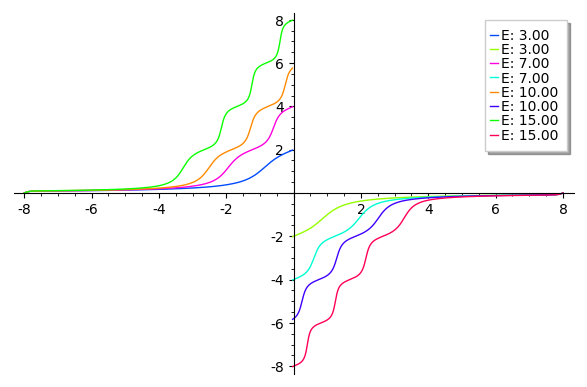

In [11]:
index = 0
def next_color():
    global index
    index += 1
    return hue(index*golden_ratio)

sum([
    sum([(lambda E, m, M:
        plot(
            lambda x: scs.propagate(E, y0, m, x)[1]/2/pi,
            (min(m, M), max(m, M)), color=next_color(), legend_label="E: %.2f"%E
        )
    )(E, *m) for m in [
        [scs.min, scs.__match],
        [scs.max, scs.__match]
    ]])
for E in [3, 7, 10, 15]]
    # , plot(lambda x: x*x - E, (scs.min, scs.max), color="black", legend_label="V-E")
).show()

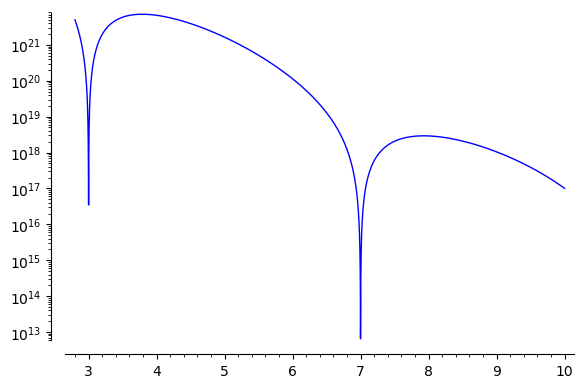

In [3]:
def error(E):
    l, dl = map(matrix, scs.propagate(E, y0, scs.min, scs.__match)[0])
    r, dr = map(matrix, scs.propagate(E, y0, scs.max, scs.__match)[0])
    return det(block_matrix([[l, r], [dl, dr]]))

plot_semilogy(error, (2.8,10))

In [34]:
b0 = 1;
b1 = b0 / 2;
b2 = b1 / 12;
b3 = b2 / 30;
b4 = b3 / 56;
b5 = b4 / 90;
b6 = b5 / 132;
a0 = 1;
a1 = a0 / 6;
a2 = a1 / 20;
a3 = a2 / 42;
a4 = a3 / 72;
a5 = a4 / 110;
a6 = a5 / 156;

h = -.6
    
def theta(dk):
    sq = sqrt(abs(dk));
    tk = -dk * h^2; # ?? ==  -Z

    if tk >= 0.1:
        th = sq * h; # ?? == sZ
        sq1 = 1 / sq;
        c(j) = cos(th);
        s(j) = sin(th) * sq1;
        theta0 = (th + atan2(
            (sq1 - 1) * sin(th) * cos(th),
            1 + (sq1 - 1) * sin(th)^2));
    elif abs(tk) < 0.1:
        v = -tk;
        c(j) = b0 + v * (b1 + v * (b2 + v * (b3 + v * (b4 + v * (b5 + v * b6)))));
        s(j) = h * (a0 + v * (a1 + v * (a2 + v * (a3 + v * (a4 + v * (a5 + v * a6))))));
        theta0 = atan2(s(j), c(j));
    else:
        c(j) = cosh(h * sq);
        s(j) = sinh(h * sq) / sq;
        theta0 = atan2(s(j), c(j));
    return theta0

In [59]:
def theta_cpp(dk):
    d = h
    Z = d*d*dk
    if Z < 0:
        sZ = sign(d)*sqrt(-Z)
        return (sZ + atan2(
            (d - sZ) * sin(sqrt(-Z))/sqrt(-Z) * cos(sqrt(-Z)),
            1 + (d*sZ + Z) * (sin(sqrt(-Z))/sqrt(-Z))^2))
    else:
        sZ = sqrt(Z)
        eta = [cosh(sZ), sinh(sZ)/sZ*h]
    return  atan2(eta[1], eta[0]);

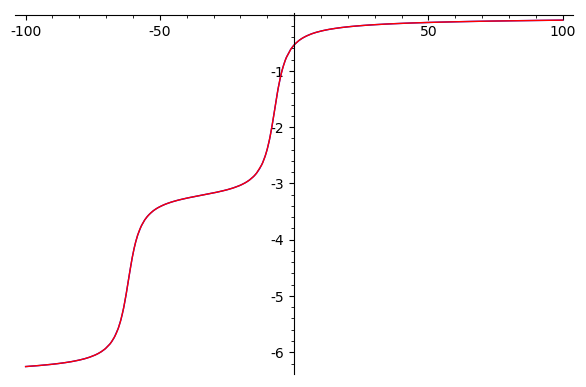

In [60]:
minmax = (-100, 100)
plot(theta, minmax) + plot(theta_cpp, minmax, color="red")